# 선형 회귀

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [6]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [12]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈.
# 바꾸기 전에는 1차원 배열의 형태였음
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [14]:
lr = LinearRegression()

# 선형회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [18]:
# 길이가 50cm인 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [20]:
# 선형 회귀(Linear Regression) 모델의 계수(coef_)와 절편(intercept_)을 출력하는 코드
# y= ax+b(a = lr.coef_, b = lr.intercept_)
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


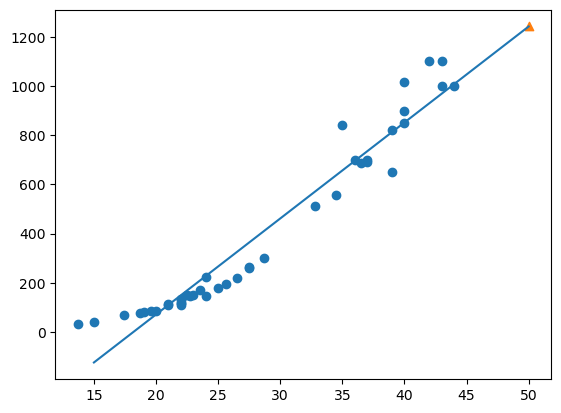

In [24]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [26]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


### 단항 회귀의 한계
- 농어의 길이 15cm에서 무게가 음수(-)가 나오는 것을 볼 수 있음. 이는 단항 회귀의 한계임
- train에 대한 결정계수와 test에 대한 결정 계수의 값의 차이가 나타남.

이걸 개선하기 위해 다항 회귀를 만듦

# 다항 회귀

In [44]:
# 2차 다항식은 주로 비선형 관계가 예상되는 데이터에 사용. 데이터가 U자형 데이터 또는 n자형 곡선을 따를 때 
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

# 예시(3차 다항식)
#train_poly = np.column_stack((train_input ** 3, train_input ** 2, train_input))


print(train_input.shape, test_input.shape)
print(train_poly.shape, test_poly.shape)

(42, 1) (14, 1)
(42, 2) (14, 2)


### 다항식 차수의 선택
- 저차 다항식(예: 2차, 3차)은 모델이 상대적으로 단순하고 과소적합(underfitting)이 발생할 가능성이 적습니다. 데이터가 간단한 관계를 가지고 있을 때는 저차 다항식이 적합할 수 있습니다.

- 고차 다항식(예: 4차, 5차)모델이 더 복잡하고 과대적합(overfitting)될 수 있습니다. 데이터에 노이즈가 많거나, 너무 복잡한 모델이 필요할 때는 고차 다항식을 사용할 수 있지만, 이 경우 훈련 데이터에만 적합하고 새로운 데이터에는 잘 적용되지 않을 수 있습니다.

In [33]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 입력값을 2차 다항식의 형식에 맞게 변환
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [35]:
print(lr.coef_, lr.intercept_)

# 1.01433211는 x2의 계수이고, -21.55792498는 x의 계수, 116.05021078278259는 절편

[  1.01433211 -21.55792498] 116.05021078278259


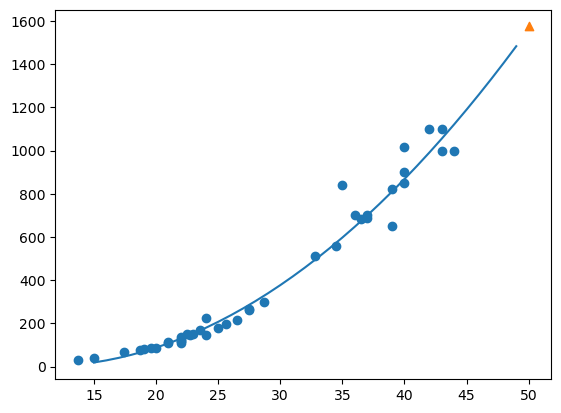

In [37]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter([50], [1574], marker='^')
plt.show()

In [39]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


다항회귀를 사용하므로서 train과 test의 성능을 일치시킴.